> #### Multi-Layer Perceptron (MLP)
* Multilayer Perceptrons (MLPs) usually mean fully connected networks, that is, each neuron in one layer is connected to all neurons in the next layer. The "fully-connectedness" of these networks makes them prone to overfitting the data.

* These MLP models are also referred to as either **deep feed forward networks or feed forward neural networks.** MLPs are common in simple logistic and linear regression problems.

* So, the objective is to **create a neural network for identifying numbers based on handwritten digits**. For example, when the input to the network is an image of a handwritten number 8, the corresponding prediction must also be the digit 8.

* MNIST is used to explain and validate deep learning theories because the 70,000 samples it contains are small, yet sufficiently rich in information (Modified National Institute of Standards and Technology dataset ).


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from tensorflow.keras.optimizers import Adam ,RMSprop
from keras import  backend as K

from subprocess import check_output
# print(check_output(["ls", "../dataset"]).decode("utf8"))

In [2]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [4]:
print(f'X_train shape:{X_train.shape} \ny_train shape: {y_train.shape}')
print(f'X_test shape:{X_test.shape} \ny_test shape: {y_test.shape}')

X_train shape:(60000, 28, 28) 
y_train shape: (60000,)
X_test shape:(10000, 28, 28) 
y_test shape: (10000,)


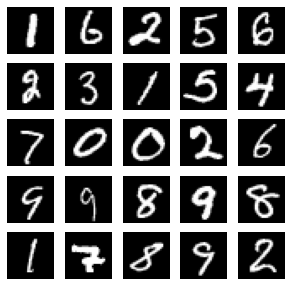

In [5]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, X_train.shape[0], size=25)
images = X_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

In [6]:
from tensorflow.keras.utils import to_categorical, plot_model

In [7]:
# compute the number of labels
num_labels = len(np.unique(y_train))

In [8]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
# image dimensions (assumed square)
image_size = X_train.shape[1]
input_size = image_size * image_size
input_size

784

In [10]:
# Reshape train and test sets to 1D tensors
X_train = np.reshape(X_train, [-1, input_size])
X_train = X_train.astype('float32') / 255
X_test = np.reshape(X_test, [-1, input_size])
X_test = X_test.astype('float32') / 255

In [11]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

# The batch_size argument indicates the number of data that we will use for each update of the model parameters.

# Hidden_units shows the number of hidden units.

# Dropout is the dropout rate (Overfitting and Regularization).

In [12]:
# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2

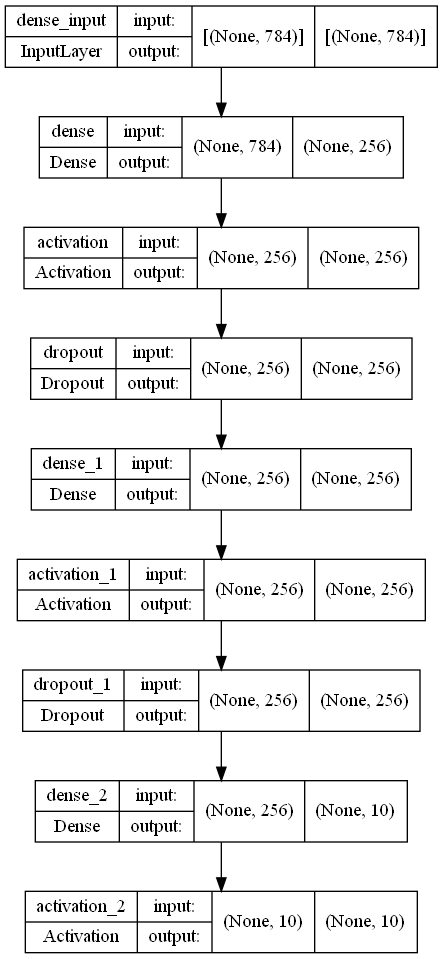

In [14]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

In [15]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [16]:
model.fit(X_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 5s 4ms/step - loss: 0.4281 - accuracy: 0.8678
Epoch 2/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1961 - accuracy: 0.9408
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1510 - accuracy: 0.9541
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1300 - accuracy: 0.9609
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1108 - accuracy: 0.9657
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1051 - accuracy: 0.9681
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0944 - accuracy: 0.9708
Epoch 8/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0898 - accuracy: 0.9725
Epoch 9/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0858 - accuracy: 0.9726
Epoch 10/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0759 - accuracy: 0.9756

In [17]:
loss, acc = model.evaluate(X_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 1s 4ms/step - loss: 0.0703 - accuracy: 0.9821

Test accuracy: 98.2%


In [18]:
from keras.regularizers import l2
model.add(Dense(hidden_units,
                kernel_regularizer=l2(0.001),
                input_dim=input_size))